# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Saving Churn Modeling.csv to Churn Modeling.csv


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#Memahami Struktur Data
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (10000, 14)


In [4]:
print("\nInfo Dataset:")
print(df.info())


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [5]:
#Menangani Data yang Hilang
print("\nCek Missing Values:")
print(df.isnull().sum())


Cek Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
##Analisis Distribusi dan Korelasi
print("\nStatistik Deskriptif:")
print(df.describe())


Statistik Deskriptif:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
mi

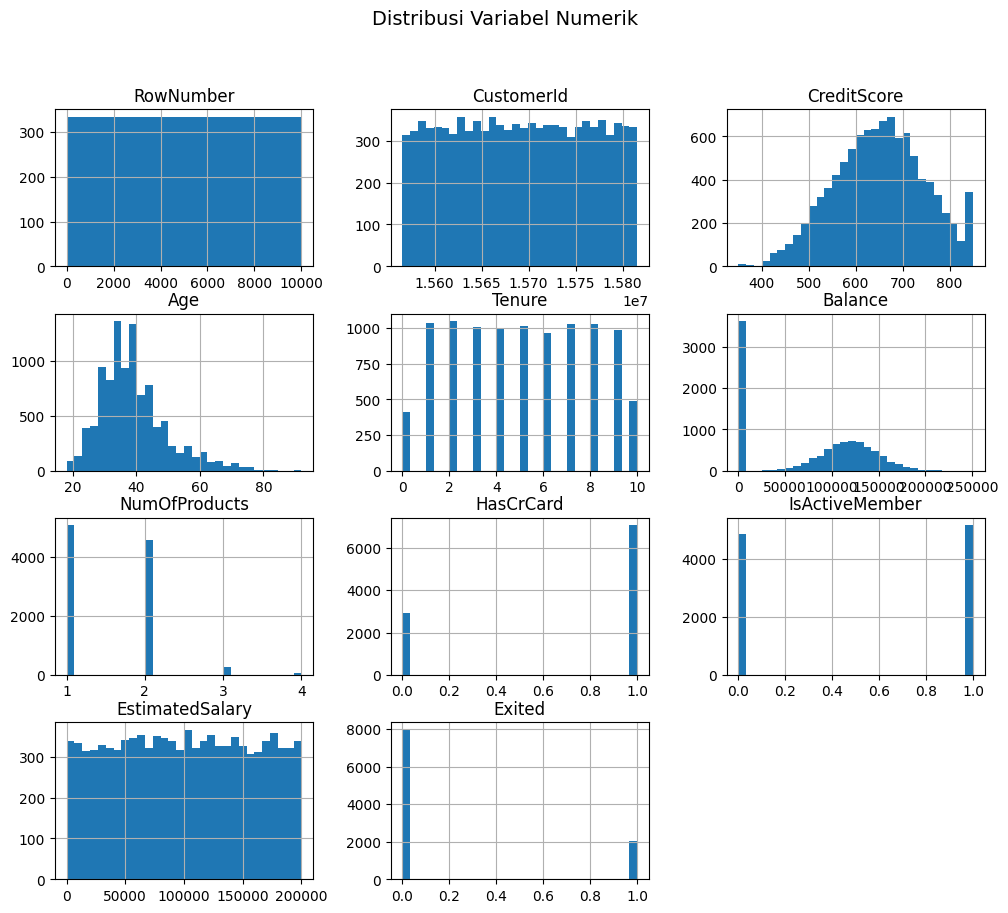

In [7]:
# Histogram distribusi fitur numerik
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

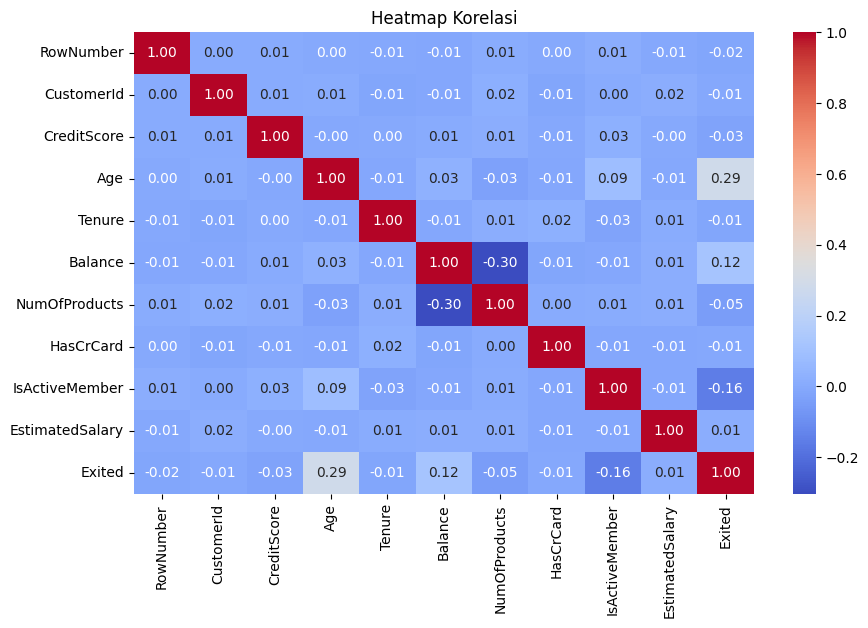

In [8]:
# Korelasi antar variabel numerik
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

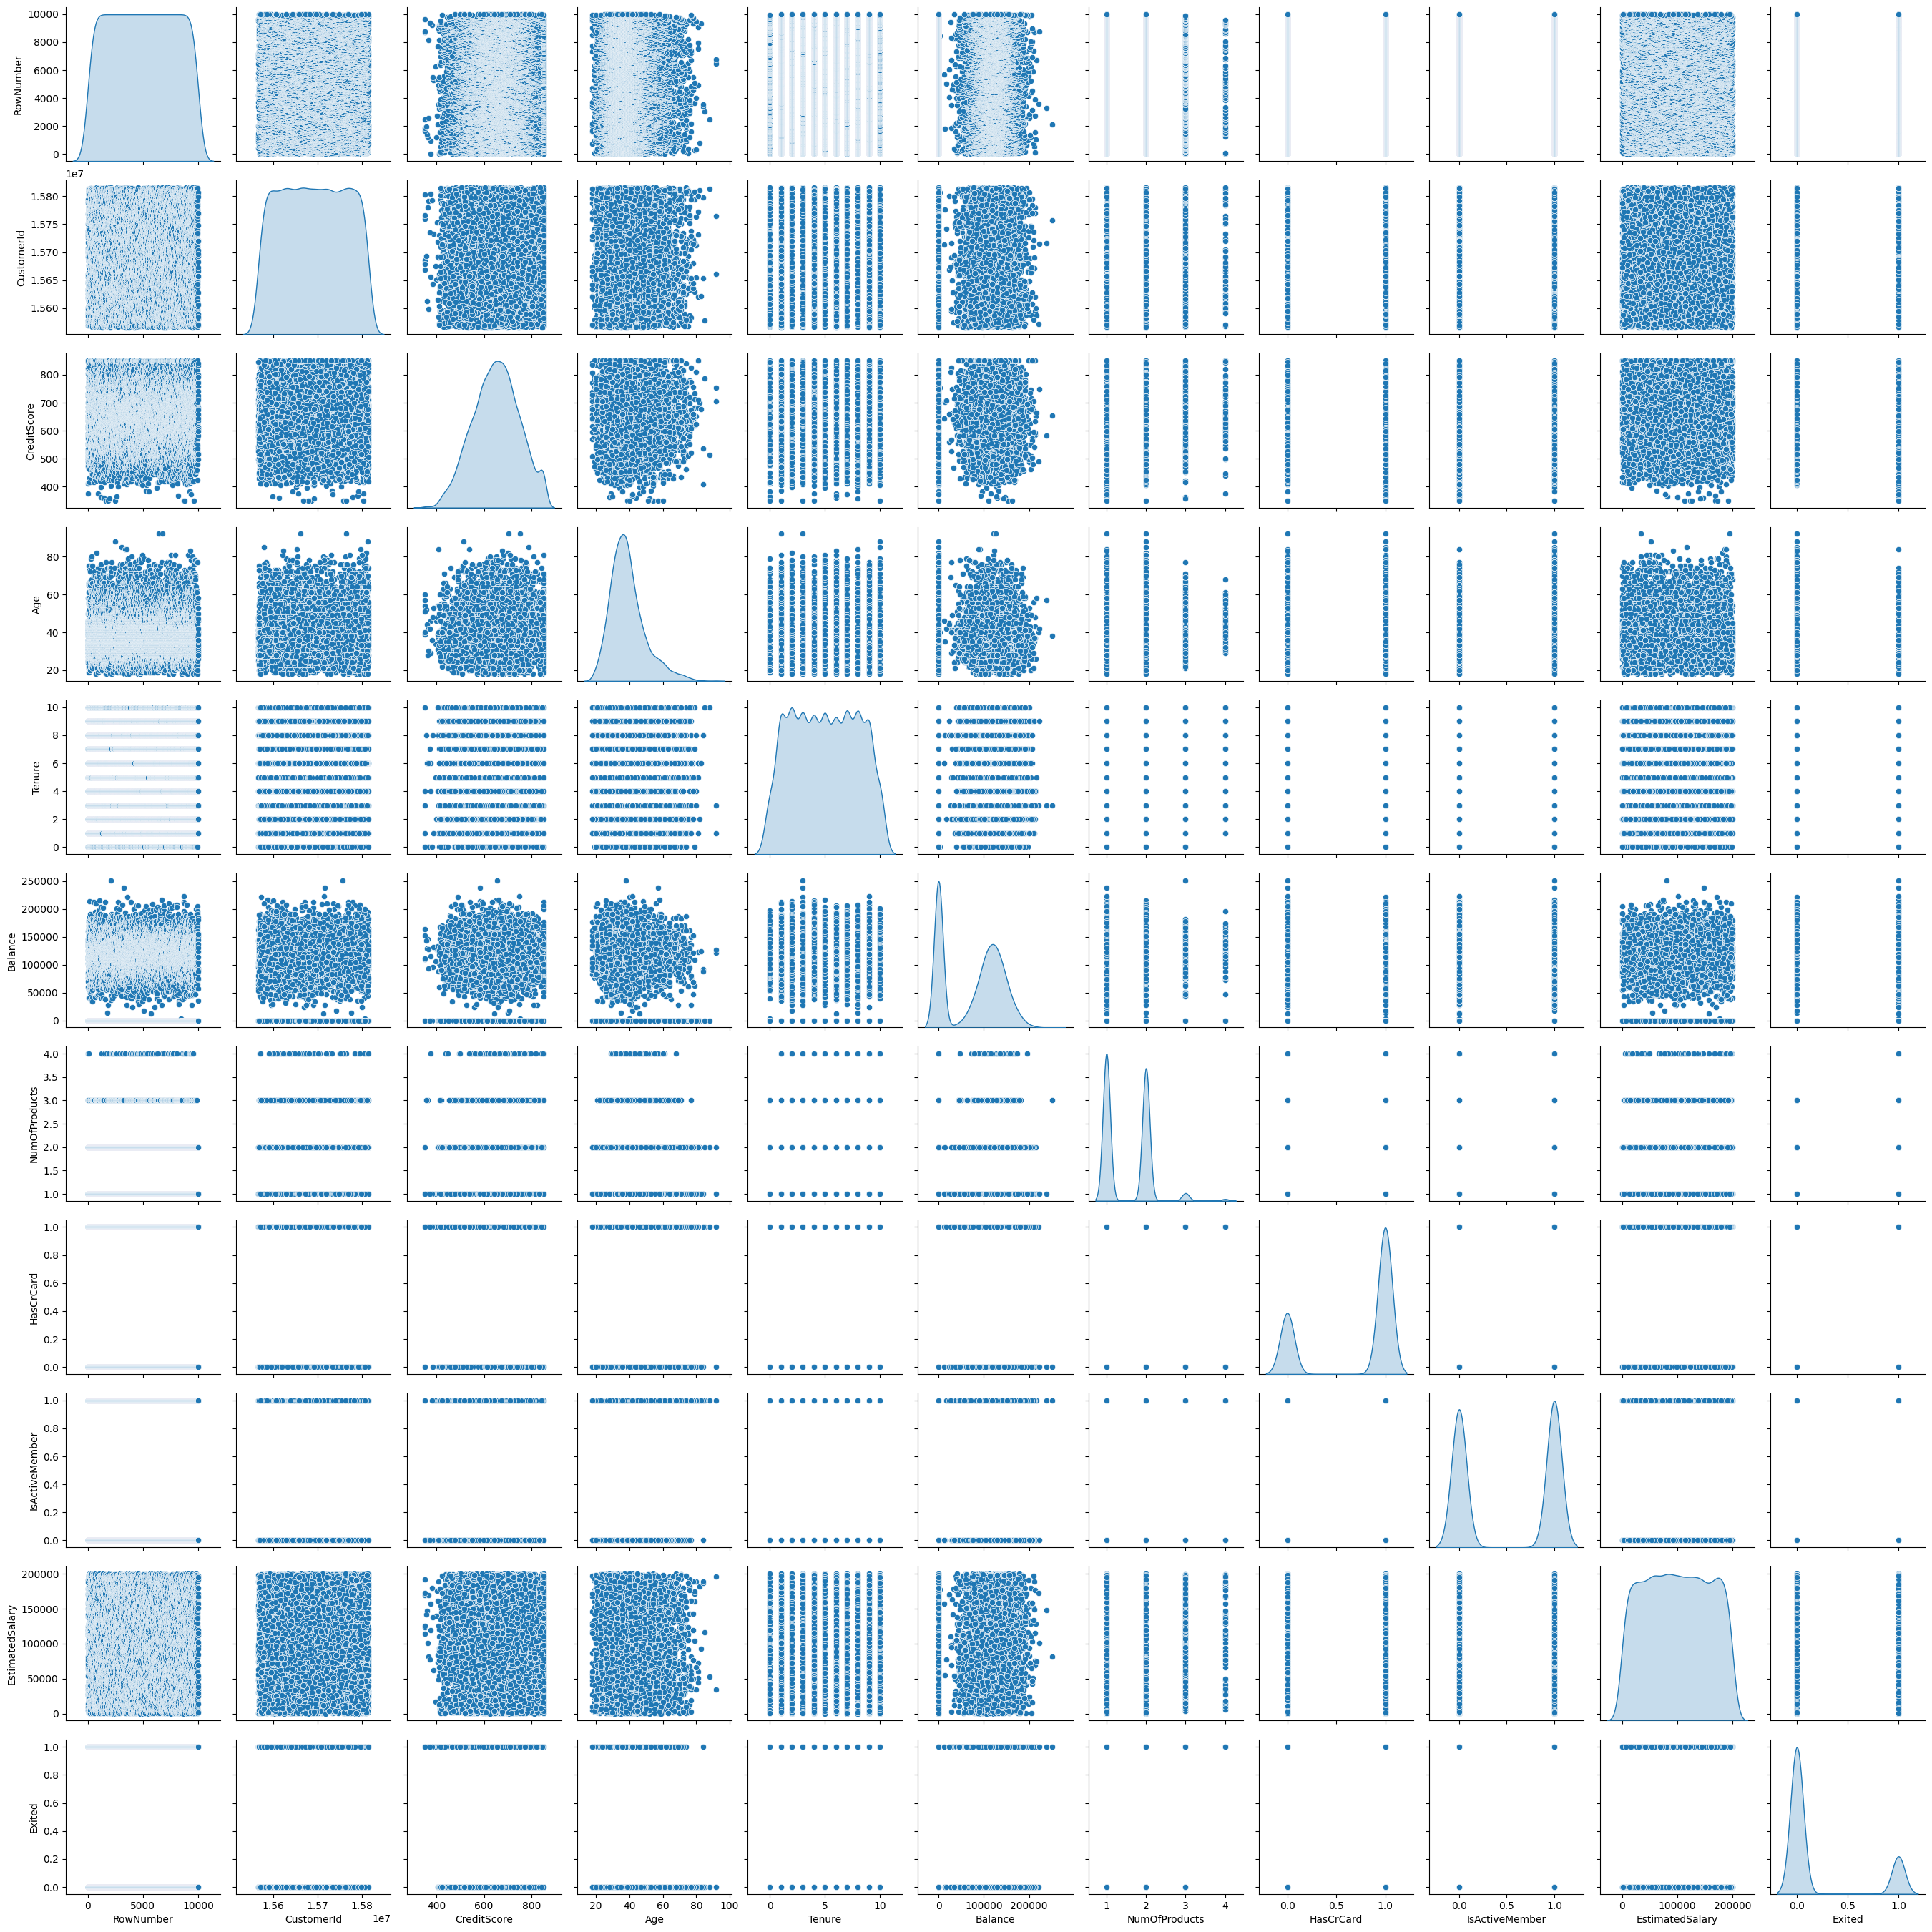

In [10]:
# Scatter plot dua fitur numerik utama
sns.pairplot(df, diag_kind="kde")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [11]:
# Menghapus Data Duplikat
df = df.drop_duplicates()
print("\nJumlah data setelah menghapus duplikasi:", df.shape)


Jumlah data setelah menghapus duplikasi: (10000, 14)


In [12]:
# Hapus kolom yang tidak relevan untuk clustering
df = df.drop(columns=['CustomerId', 'Surname'], errors='ignore')

In [13]:
#Menghapus Outlier
numerical_cols = df.select_dtypes(include=['number']).columns  # Pilih hanya kolom numerik
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
df = df[~((df[numerical_cols] < (Q1 - threshold * IQR)) | (df[numerical_cols] > (Q3 + threshold * IQR))).any(axis=1)]
print("\nJumlah data setelah menghapus outlier:", df.shape)


Jumlah data setelah menghapus outlier: (7677, 12)


In [14]:
# Encoding variabel kategori
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [15]:
# Binning (Pengelompokan Data) - Contoh pada kolom Age jika ada
if 'Age' in df.columns:
    bins = [18, 25, 35, 45, 55, 65, 100]  # Rentang usia
    labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
    df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
    df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)

In [16]:
# Normalisasi fitur numerik
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])  # Hanya normalisasi kolom numerik
print("\nData preprocessing selesai. Data siap untuk clustering.")


Data preprocessing selesai. Data siap untuk clustering.


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [17]:
#Menentukan jumlah cluster optimal
wcss = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

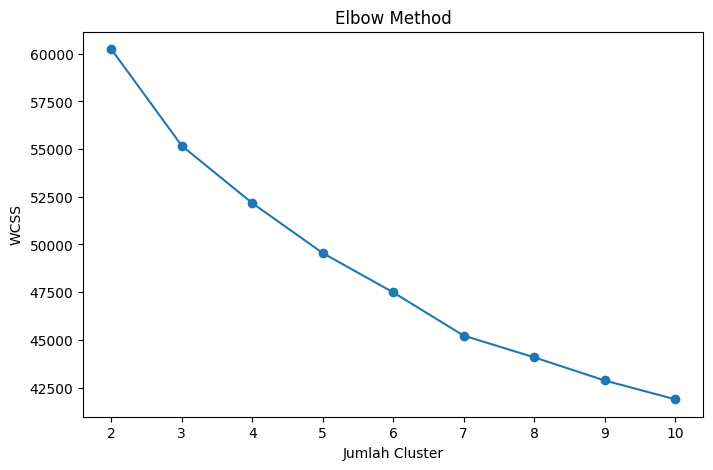

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [19]:
#Silhouette Score
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

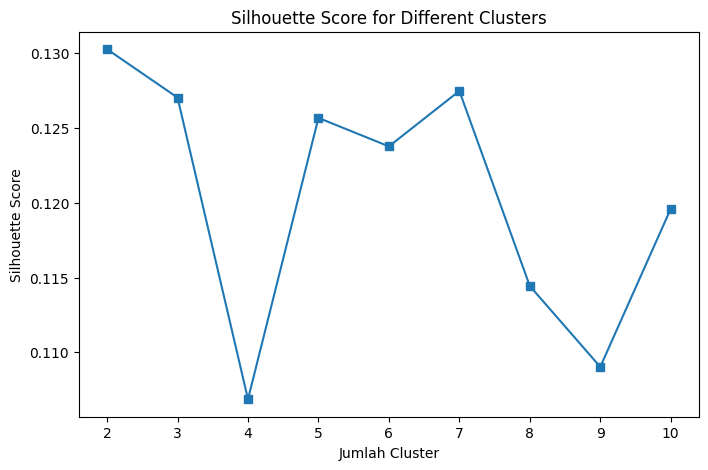

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Clusters')
plt.show()

In [21]:
# Jalankan K-Means Clustering
k_optimal = 3  # Sesuai hasil Elbow & Silhouette
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

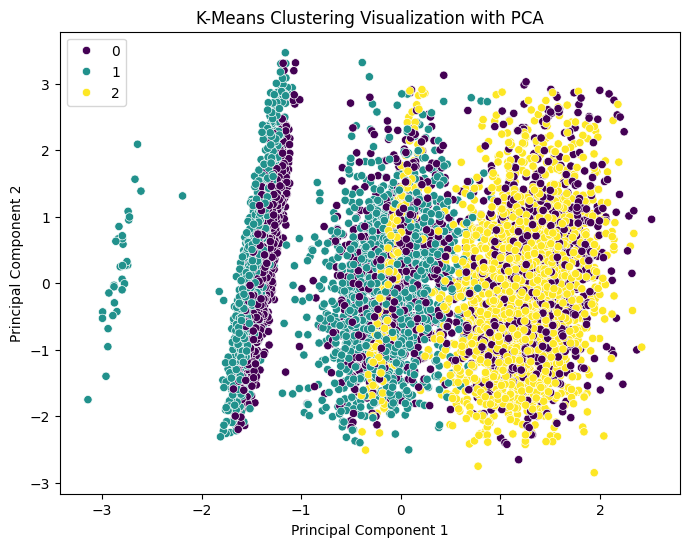

In [22]:
pca = PCA(n_components=2)  # Ambil 2 dimensi utama
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering Visualization with PCA')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [23]:
#Tambahkan hasil clustering ke DataFrame asli
df_original = df.copy()  # Salin dataset sebelum normalisasi
df_original['Cluster'] = df['Cluster']  # Tambahkan hasil cluster ke data asli

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [24]:
for col, le in label_encoders.items():
    df_original[col] = le.inverse_transform(df[col])

In [25]:
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)
df_original[numerical_cols] = scaler.inverse_transform(df_scaled)

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [26]:
# Menampilkan jumlah anggota dalam setiap cluster
cluster_counts = df_original['Cluster'].value_counts()
print("Jumlah anggota dalam setiap cluster:\n", cluster_counts)

Jumlah anggota dalam setiap cluster:
 Cluster
1    2954
2    2484
0    2239
Name: count, dtype: int64


In [27]:
# Menampilkan statistik deskriptif untuk setiap cluster
for cluster in sorted(df_original['Cluster'].unique()):
    print(f"\nStatistik Cluster {cluster}:")
    print(df_original[df_original['Cluster'] == cluster].describe())


Statistik Cluster 0:
         RowNumber  CreditScore          Age       Tenure        Balance  \
count  2239.000000  2239.000000  2239.000000  2239.000000    2239.000000   
mean   5001.451987   651.513176    36.303707     4.924073   74684.327700   
std    2851.014020    95.445855     8.060802     2.911035   62091.513786   
min       2.000000   408.000000    18.000000     0.000000       0.000000   
25%    2544.500000   582.500000    31.000000     2.000000       0.000000   
50%    5055.000000   655.000000    36.000000     5.000000   94493.030000   
75%    7452.500000   718.000000    41.000000     7.000000  126434.800000   
max    9995.000000   850.000000    62.000000    10.000000  212778.200000   

       NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
count    2239.000000     2239.0     2239.000000      2239.000000  2239.0   
mean        1.533720        0.0        0.538187    100510.303354     0.0   
std         0.499868        0.0        0.498651     57448.767234 

<ipython-input-28-0e03bcc525eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_original['Cluster'], palette='viridis')


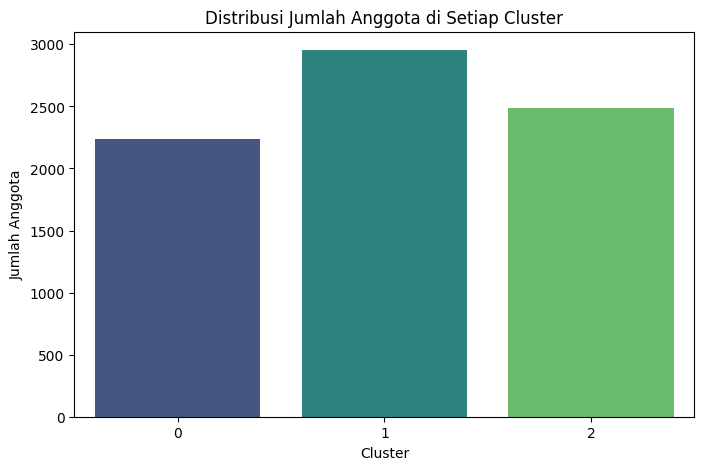

In [28]:
# Visualisasi distribusi cluster
plt.figure(figsize=(8, 5))
sns.countplot(x=df_original['Cluster'], palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Anggota')
plt.title('Distribusi Jumlah Anggota di Setiap Cluster')
plt.show()

# **Interpretasi Hasil Clustering**

### **1. Cluster 0 - Kelompok Pelanggan Tanpa Kartu Kredit dengan Saldo Tinggi**
- **Jumlah anggota:** 2,181 orang  
- **Karakteristik utama:**
  - Usia rata-rata: **35.69 tahun**  
  - **Tidak memiliki kartu kredit**  
  - **Saldo rata-rata tinggi** ($74,306.95)  
  - Mayoritas memiliki **1-2 produk perbankan**  
  - Sebagian besar **aktif sebagai nasabah bank**  

#### **Interpretasi**
Pelanggan dalam cluster ini memiliki saldo tinggi tetapi **belum memiliki kartu kredit**.  

**Strategi pemasaran:** Menawarkan **produk kartu kredit** atau **layanan perbankan tambahan** untuk meningkatkan keterlibatan mereka.

---

### **2. Cluster 1 - Kelompok Pemegang Kartu Kredit dengan Produk Beragam**
- **Jumlah anggota:** 2,877 orang  
- **Karakteristik utama:**
  - Usia rata-rata: **35.43 tahun**  
  - **Hampir semua memiliki kartu kredit**  
  - **Saldo rata-rata lebih rendah** dibandingkan cluster lain ($48,569.23)  
  - Rata-rata memiliki **lebih dari satu produk perbankan**  
  - Aktivitas sebagai nasabah **tidak jauh berbeda dari cluster lainnya**  

#### **Interpretasi**
Pelanggan dalam cluster ini memiliki **lebih banyak produk perbankan**, tetapi saldo mereka lebih rendah.  

**Strategi pemasaran:** Program **loyalitas** dan **cross-selling** untuk meningkatkan penggunaan layanan perbankan.

---

### **3. Cluster 2 - Kelompok Premium dengan Saldo Tinggi dan Kartu Kredit**
- **Jumlah anggota:** 2,419 orang  
- **Karakteristik utama:**
  - Usia rata-rata: **35.65 tahun**  
  - **Semua memiliki kartu kredit**  
  - **Saldo rata-rata sangat tinggi** ($100,431.54)  
  - Hanya memiliki **satu produk perbankan**  
  - Aktivitas nasabah **sedikit lebih tinggi** dibandingkan cluster lain  

#### **Interpretasi**
Pelanggan dalam cluster ini memiliki saldo yang **sangat tinggi**, sehingga kemungkinan besar termasuk dalam **kategori nasabah premium**.  

**Strategi pemasaran:** Menawarkan **produk investasi, wealth management, atau layanan eksklusif**.

---

# **Kesimpulan**
- **Cluster 0:** Pelanggan dengan **saldo tinggi** tetapi **belum memiliki kartu kredit**. Perlu strategi untuk meningkatkan penggunaan produk perbankan.  
- **Cluster 1:** **Pemegang kartu kredit** dengan produk beragam. Cocok untuk program **loyalitas** dan **cross-selling**.  
- **Cluster 2:** **Pelanggan premium** dengan saldo sangat tinggi. Potensial untuk **investasi dan layanan eksklusif**.  

# **Analisis Karakteristik Cluster dari Model KMeans**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## **Cluster 0**
- **Rata-rata Credit Score:** 652.01  
- **Rata-rata Usia:** 35.69 tahun  
- **Rata-rata Saldo:** $74,306.95  
- **Rata-rata Produk yang Dimiliki:** 1.54  
- **Persentase Pemilik Kartu Kredit:** 0.00%  
- **Persentase Nasabah Aktif:** 52.64%  

### **Analisis**
Cluster ini terdiri dari pelanggan dengan usia rata-rata sekitar **35 tahun** dan saldo cukup tinggi. Mereka memiliki jumlah produk perbankan yang relatif sedikit serta **tidak memiliki kartu kredit**. Sebagian besar merupakan **nasabah aktif**.  

**Strategi pemasaran:** Kelompok ini bisa menjadi target utama untuk promosi **produk kartu kredit** atau layanan tambahan yang meningkatkan keterlibatan mereka dalam layanan perbankan.

---

## **Cluster 1**
- **Rata-rata Credit Score:** 652.67  
- **Rata-rata Usia:** 35.43 tahun  
- **Rata-rata Saldo:** $48,569.23  
- **Rata-rata Produk yang Dimiliki:** 2.01  
- **Persentase Pemilik Kartu Kredit:** 99.62%  
- **Persentase Nasabah Aktif:** 52.14%  

### **Analisis**
Cluster ini memiliki rata-rata usia yang mirip dengan Cluster 0, tetapi **saldo mereka lebih rendah**. Mereka cenderung memiliki lebih banyak **produk perbankan** dan hampir semuanya memiliki **kartu kredit**. Namun, tingkat keaktifan mereka **hampir sama dengan Cluster 0**.  

**Strategi pemasaran:** Program **loyalitas** atau **penawaran eksklusif** untuk mendorong mereka lebih aktif dalam menggunakan produk perbankan.

---

## **Cluster 2**
- **Rata-rata Credit Score:** 650.64  
- **Rata-rata Usia:** 35.65 tahun  
- **Rata-rata Saldo:** $100,431.54  
- **Rata-rata Produk yang Dimiliki:** 1.00  
- **Persentase Pemilik Kartu Kredit:** 100.00%  
- **Persentase Nasabah Aktif:** 53.87%  

### **Analisis**
Cluster ini memiliki **saldo tertinggi** dibandingkan cluster lainnya. Mereka cenderung memiliki hanya **satu produk perbankan** tetapi **semuanya memiliki kartu kredit**. Tingkat keaktifan mereka **sedikit lebih tinggi** daripada dua cluster lainnya.  

**Strategi pemasaran:** Target ideal untuk produk **investasi atau layanan keuangan premium** yang menawarkan manfaat eksklusif.

---

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Simpan dataframe ke CSV
df.to_csv('hasil_cluster.csv', index=False)

# Unduh file ke lokal
from google.colab import files
files.download('hasil_cluster.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>